## Data Import and Matrix Split

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

### Fill in gender in R1 and R2 matrix

In [3]:
df = pd.read_csv('Intersection_Y1R1R2_0702Y1_R1_R2_on_0702clean_data.csv')

In [4]:
df = pd.read_csv('Intersection_Y1R1R2_0702Y1_0702.csv')
Y1 = df.loc[:, 'UniqueID':'t39_combo']
Y1['RiskFactor'] = df['RiskFactor']
Y1['Gender'] = df['Gender']

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,UniqueID,a1_combo,a2_combo,a3_combo,a4_combo,a5_combo,a6_combo,b7_combo,...,Age,Date,Gender,GRYD_Zone,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Latino,Ethnicity_White,Ethnicity_Other,RiskFactor
0,0,851,3538.0,3.0,3.0,4.0,4.0,3.0,2.0,3.0,...,13.0,2009-11-12,1.0,4.0,0.0,0.0,1.0,0.0,0.0,7.0
1,3,869,3552.0,3.0,4.0,4.0,3.0,4.0,2.0,4.0,...,14.0,2009-11-16,2.0,5.0,0.0,0.0,1.0,0.0,0.0,7.0
2,6,892,3569.0,3.0,5.0,4.0,1.0,4.0,2.0,5.0,...,13.0,2009-11-17,1.0,17.0,0.0,0.0,1.0,0.0,0.0,7.0
3,9,895,3570.0,3.0,4.0,2.0,3.0,4.0,3.0,3.0,...,10.0,2009-11-18,1.0,17.0,1.0,0.0,0.0,0.0,0.0,5.0
4,12,919,3586.0,4.0,4.0,5.0,5.0,4.0,1.0,3.0,...,11.0,2009-11-19,2.0,4.0,0.0,0.0,1.0,0.0,0.0,7.0


In [5]:
df = pd.read_csv('Intersection_Y1R1R2_0702R1_0702.csv')
R1 = df.loc[:, 'UniqueID':'t39_combo']
R1['RiskFactor'] = df['RiskFactor']
R1['Gender'] = df['Gender']

In [6]:
df = pd.read_csv('Intersection_Y1R1R2_0702R2_0702.csv')
R2 = df.loc[:, 'UniqueID':'t39_combo']
R2['RiskFactor'] = df['RiskFactor']
R2['Gender'] = df['Gender']

In [7]:
# change all nan gender values in R1 according to their values in Y1

for index in R1.index:
    if pd.isnull(R1.loc[index, 'Gender']):
        gender = Y1.loc[index,'Gender']
        R1.loc[index, 'Gender'] = gender

In [8]:
# change all nan gender values in R2 according to their values in Y1

for index in R2.index:
    if pd.isnull(R2.loc[index, 'Gender']):
        gender = Y1.loc[index,'Gender']
        R2.loc[index, 'Gender'] = gender

In [9]:
Gender_Incos = []
for index in Y1.index:
    if (Y1.loc[index, 'Gender'] != R1.loc[index, 'Gender']) or (R1.loc[index, 'Gender'] != R2.loc[index, 'Gender']) or (Y1.loc[index, 'Gender'] != R2.loc[index, 'Gender']) :
        Gender_Incos.append(Y1.loc[index, 'UniqueID'])

### Drop IDs with Nan values

In [10]:
#indices
columns = Y1.columns.tolist()
columns = columns[:-1]

#create list of indices that have NaN values in their rows
index_list=[]
for col in columns:   
    index_list.extend(Y1[Y1[col].isnull()].index.tolist())
index_list

#make this list unique
my_set = set(index_list)
unique_index_list = list(my_set)
unique_index_list

[]

In [11]:
#create list of indices that have NaN values in their rows
index_list=[]
for col in columns:   
    index_list.extend(R1[R1[col].isnull()].index.tolist())
index_list

#make this list unique
my_set = set(index_list)
unique_index_list1 = list(my_set)
unique_index_list1

[512, 770, 169, 624, 402, 56, 1087, 927]

In [12]:
#create list of indices that have NaN values in their rows
index_list=[]
for col in columns:   
    index_list.extend(R2[R2[col].isnull()].index.tolist())
index_list

#make this list unique
my_set = set(index_list)
unique_index_list2 = list(my_set)
unique_index_list2

[1297, 182, 347, 446, 763]

In [13]:
#make list of UniqueIDs associated with these NaN values
ID_list = []
for i in unique_index_list1:
    ID_list.append(R1.loc[i,'UniqueID'])
ID_list

[14334.0, 17710.0, 11189.0, 16486.0, 12668.0, 4960.0, 25920.0, 22418.0]

In [14]:
#make list of UniqueIDs associated with these NaN values
for i in unique_index_list2:
    ID_list.append(R2.loc[i,'UniqueID'])
ID_list

[14334.0,
 17710.0,
 11189.0,
 16486.0,
 12668.0,
 4960.0,
 25920.0,
 22418.0,
 32402.0,
 11205.0,
 12560.0,
 13876.0,
 17696.0]

In [15]:
ID_list.extend(Gender_Incos)

In [16]:
ID_list

[14334.0,
 17710.0,
 11189.0,
 16486.0,
 12668.0,
 4960.0,
 25920.0,
 22418.0,
 32402.0,
 11205.0,
 12560.0,
 13876.0,
 17696.0,
 5957.0,
 6183.0,
 11177.0,
 11195.0,
 11218.0,
 11394.0,
 11419.0,
 11752.0,
 12926.0,
 12952.0,
 13071.0,
 17040.0,
 17651.0,
 17851.0,
 17959.0,
 21493.0,
 22624.0,
 28767.0,
 29298.0,
 29415.0,
 29542.0,
 29704.0,
 31457.0,
 31947.0,
 32298.0,
 33616.0,
 34230.0,
 41607.0,
 43947.0]

In [17]:
#drop these IDs from the data
for id in ID_list:
    Y1 = Y1[Y1['UniqueID']!=id]

In [18]:
#drop these IDs from the data
for id in ID_list:
    R1 = R1[R1['UniqueID']!=id]

In [19]:
#drop these IDs from the data
for id in ID_list:
    R2 = R2[R2['UniqueID']!=id]

## Split each matrix by Gender

In [21]:
Y1_M = Y1[Y1['Gender'] == 1]
Y1_F = Y1[Y1['Gender'] == 2]
Y1_M = Y1_M.drop('UniqueID', axis=1)
Y1_F = Y1_F.drop('UniqueID', axis=1)
Y1_M = Y1_M.drop('Gender', axis=1)
Y1_F = Y1_F.drop('Gender', axis=1)
Y1_M = Y1_M.transpose()
Y1_F = Y1_F.transpose()

In [22]:
Y1_M.shape

(40, 1007)

In [23]:
Y1_F.shape

(40, 627)

In [24]:
R1_M = R1[R1['Gender'] == 1]
R1_F = R1[R1['Gender'] == 2]
R1_M = R1_M.drop('UniqueID', axis=1)
R1_F = R1_F.drop('UniqueID', axis=1)
R1_M = R1_M.drop('Gender', axis=1)
R1_F = R1_F.drop('Gender', axis=1)
R1_M = R1_M.transpose()
R1_F = R1_F.transpose()
R1_M.shape

(40, 1007)

In [25]:
R1_F.shape

(40, 627)

In [26]:
R2_M = R2[R2['Gender'] == 1]
R2_F = R2[R2['Gender'] == 2]
R2_M = R2_M.drop('UniqueID', axis=1)
R2_F = R2_F.drop('UniqueID', axis=1)
R2_M = R2_M.drop('Gender', axis=1)
R2_F = R2_F.drop('Gender', axis=1)
R2_M = R2_M.transpose()
R2_F = R2_F.transpose()
R2_M.shape

(40, 1007)

## DMD for Gender

### Y1 to R1

#### Female Y1 to R1

In [28]:
U_Y1F,Sig_Y1F,V_Y1F=np.linalg.svd(Y1_F, full_matrices=False)    
U_Y1F_T=U_Y1F.conjugate().transpose()
V_Y1F_T=V_Y1F.conjugate().transpose()
Sig_inv_Y1F=np.zeros((40, 40))
for i in range(40):
    for j in range(40):
        if i==j:
            Sig_inv_Y1F[i][j]=1/Sig_Y1F[i]

In [29]:
A_step1=np.dot(R1_F,V_Y1F_T)
A_step2=np.dot(A_step1,Sig_inv_Y1F)
A_Y1F_R1=np.dot(A_step2,U_Y1F_T)
A_Y1F_R1

array([[ 0.20881979,  0.04493129, -0.03796291, ...,  0.02751805,
         0.01877879, -0.01621163],
       [ 0.03637258,  0.35174592,  0.15682084, ...,  0.08165186,
        -0.0192202 , -0.0850597 ],
       [-0.00058333,  0.02515757,  0.19921465, ...,  0.07403117,
        -0.00531749, -0.09041798],
       ...,
       [-0.02399602,  0.07395079,  0.06197742, ...,  0.35537972,
         0.02658546, -0.06704567],
       [-0.03763274,  0.10522136, -0.03190474, ...,  0.05301494,
         0.54978365,  0.00120663],
       [ 0.00834244,  0.23974295,  0.02013961, ...,  0.22720731,
         0.04774191,  0.10584987]])

In [30]:
values_Y1_F, vectors_Y1_F = np.linalg.eig(A_Y1F_R1)

In [31]:
eiglog_Y1_F = np.log(values_Y1_F)

In [32]:
lamphi_Y1_F=np.zeros(40)
for i in range (40):
    rep=vectors_Y1_F[i]
    norm=np.linalg.norm(rep)
    val=np.absolute(values_Y1_F[i])*norm
    lamphi_Y1_F[i]=val

#### Male Y1 to R1

In [33]:
U_Y1M,Sig_Y1M,V_Y1M=np.linalg.svd(Y1_M, full_matrices=False)    
U_Y1M_T=U_Y1M.conjugate().transpose()
V_Y1M_T=V_Y1M.conjugate().transpose()
Sig_inv_Y1M=np.zeros((40, 40))
for i in range(40):
    for j in range(40):
        if i==j:
            Sig_inv_Y1M[i][j]=1/Sig_Y1M[i]

In [34]:
A_step1=np.dot(R1_M,V_Y1M_T)
A_step2=np.dot(A_step1,Sig_inv_Y1M)
A_Y1M_R1=np.dot(A_step2,U_Y1M_T)
A_Y1M_R1

array([[ 0.23144925,  0.01210084,  0.01233496, ...,  0.04544599,
        -0.01808485, -0.0536752 ],
       [ 0.00937156,  0.31783391,  0.01742228, ...,  0.01384424,
        -0.03003523, -0.09862578],
       [ 0.06178845,  0.00391264,  0.19157174, ...,  0.03428975,
        -0.02480651, -0.04301519],
       ...,
       [-0.01912048, -0.06155558,  0.0205859 , ...,  0.3155704 ,
         0.09707547, -0.08391453],
       [-0.04936287, -0.0953415 ,  0.03077748, ...,  0.05300537,
         0.42148713,  0.0199454 ],
       [ 0.00565947, -0.07360601,  0.15092578, ...,  0.22472515,
         0.0182786 , -0.05558069]])

In [35]:
values_Y1_M, vectors_Y1_M = np.linalg.eig(A_Y1M_R1)

In [36]:
eiglog_Y1_M = np.log(values_Y1_M)

In [37]:
lamphi_Y1_M=np.zeros(40)
for i in range (40):
    rep=vectors_Y1_M[i]
    norm=np.linalg.norm(rep)
    val=np.absolute(values_Y1_M[i])*norm
    lamphi_Y1_M[i]=val

### R1 to R2

#### Female R1 to R2

In [38]:
U_R1F,Sig_R1F,V_R1F=np.linalg.svd(R1_F, full_matrices=False)    
U_R1F_T=U_R1F.conjugate().transpose()
V_R1F_T=V_R1F.conjugate().transpose()
Sig_inv_R1F=np.zeros((40, 40))
for i in range(40):
    for j in range(40):
        if i==j:
            Sig_inv_R1F[i][j]=1/Sig_R1F[i]

In [45]:
A_step1=np.dot(R2_F,V_R1F_T)
A_step2=np.dot(A_step1,Sig_inv_R1F)
A_R1F_R2=np.dot(A_step2,U_R1F_T)
A_R1F_R2

array([[ 2.33986031e-01,  1.08683373e-01,  7.90764813e-02, ...,
         1.39699762e-02,  2.66099636e-02, -5.99300175e-02],
       [-6.22061659e-02,  3.54871397e-01,  3.56426716e-02, ...,
         8.05428869e-02,  6.15366938e-02, -1.92310364e-01],
       [-2.87794447e-02,  8.54058530e-02,  2.61911104e-01, ...,
         5.28432531e-04, -4.79399738e-03, -1.14605810e-01],
       ...,
       [-4.59816419e-02,  2.82115723e-02, -6.45747592e-02, ...,
         2.28073745e-01,  3.17111467e-02, -1.24200253e-02],
       [ 6.19083774e-03,  2.18480343e-02, -7.32441649e-02, ...,
         1.51385279e-02,  5.38229096e-01, -2.97597270e-02],
       [ 5.35377665e-02, -2.55118464e-02, -3.00685951e-03, ...,
         9.96675849e-02,  1.61267801e-01,  7.77448882e-02]])

In [46]:
values_R1_F, vectors_R1_F = np.linalg.eig(A_R1F_R2)

In [47]:
eiglog_R1_F = np.log(values_R1_F)

In [48]:
lamphi_R1_F=np.zeros(40)
for i in range (40):
    rep=vectors_R1_F[i]
    norm=np.linalg.norm(rep)
    val=np.absolute(values_R1_F[i])*norm
    lamphi_R1_F[i]=val

#### Male R1 to R2

In [49]:
U_R1M,Sig_R1M,V_R1M=np.linalg.svd(R1_M, full_matrices=False)    
U_R1M_T=U_R1M.conjugate().transpose()
V_R1M_T=V_R1M.conjugate().transpose()
Sig_inv_R1M=np.zeros((40, 40))
for i in range(40):
    for j in range(40):
        if i==j:
            Sig_inv_R1M[i][j]=1/Sig_R1M[i]

In [50]:
A_step1=np.dot(R2_M,V_R1M_T)
A_step2=np.dot(A_step1,Sig_inv_R1M)
A_R1M_R2=np.dot(A_step2,U_R1M_T)
A_R1M_R2

array([[ 0.20409385,  0.1233753 ,  0.04305861, ...,  0.04966045,
         0.01839863, -0.10877503],
       [-0.02306634,  0.36579648,  0.17044416, ...,  0.03814307,
         0.06424859, -0.19038575],
       [ 0.00949313,  0.10399644,  0.25111558, ...,  0.08291474,
         0.05039847, -0.14786463],
       ...,
       [ 0.00649129, -0.00431045, -0.06039669, ...,  0.39281271,
         0.04703848, -0.02529676],
       [-0.06869045, -0.02943651, -0.00880631, ...,  0.06284629,
         0.5182006 , -0.07193654],
       [-0.05626056,  0.01673206,  0.03642054, ...,  0.27816761,
         0.16629506,  0.04914327]])

In [51]:
values_R1_M, vectors_R1_M = np.linalg.eig(A_R1M_R2)

In [52]:
eiglog_R1_M = np.log(values_R1_M)

In [53]:
lamphi_R1_M=np.zeros(40)
for i in range (40):
    rep=vectors_R1_M[i]
    norm=np.linalg.norm(rep)
    val=np.absolute(values_R1_M[i])*norm
    lamphi_R1_M[i]=val

## Graphs

In [65]:
label=['a1', 'a2',
       'a3', 'a4', 'a5', 'a6', 'b7', 'b8',
       'b9', 'c10', 'c11', 'c12', 'c13',
       'c14', 'c15', 'c16', 'de17', 'de18',
       'de19', 'de20', 'f21', 'f22', 'f23o',
       'f24', 'f25', 'f26', 'g27', 'g28',
       'g29', 'g30', 'g31', 'h32', 'h33',
       'h34', 'h35', 'h36', 'h37', 't38',
       't39','RiskFactor']

### PLOTs of the last row in transformation matrix

#### Importance from Y1 to R1 

<BarContainer object of 39 artists>

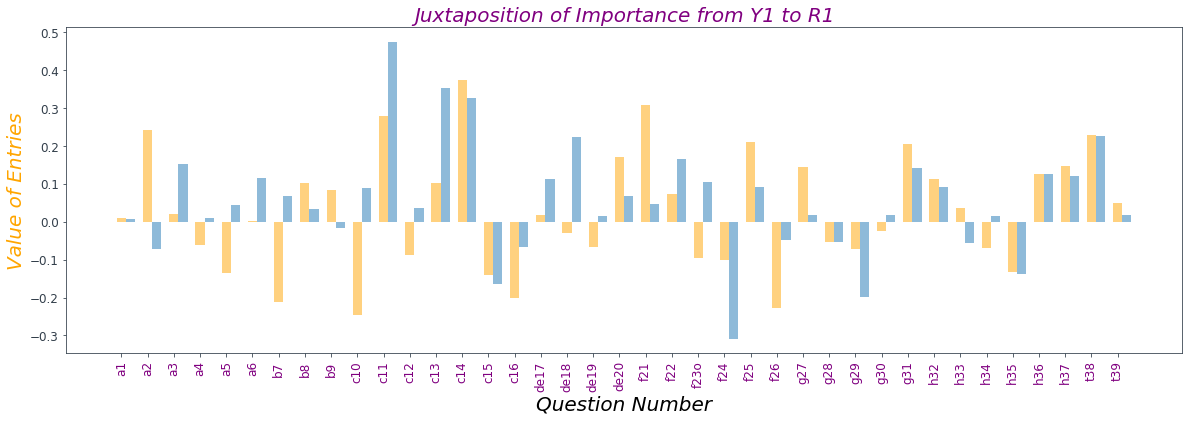

In [73]:
index=np.zeros(39)
for i in range (39):
    index[i]=i
Gender = ['Female','Male']
pos = np.arange(len(index))
bar_width = 0.35
plt.figure(figsize=(20,6))
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.title('Juxtaposition of Importance from Y1 to R1', fontsize=20, fontweight=0, color='purple', loc='center', style='italic' ) 
plt.xticks(np.arange(min(index), max(index)+1, 1.0),label, color='purple',rotation='vertical')
plt.xlabel('Question Number',fontsize=20, style='italic' )
plt.ylabel('Value of Entries',fontsize=20, color='orange', style='italic' )
plt.bar(pos,A_Y1F_R1[-1,:][:39],bar_width,alpha=0.5,color='orange')
plt.bar(pos+bar_width,A_Y1M_R1[-1,:][:39],bar_width,alpha=0.5)

#### orange represents girls, and blue represents boys 

#### Importance from R1 to R2

<BarContainer object of 39 artists>

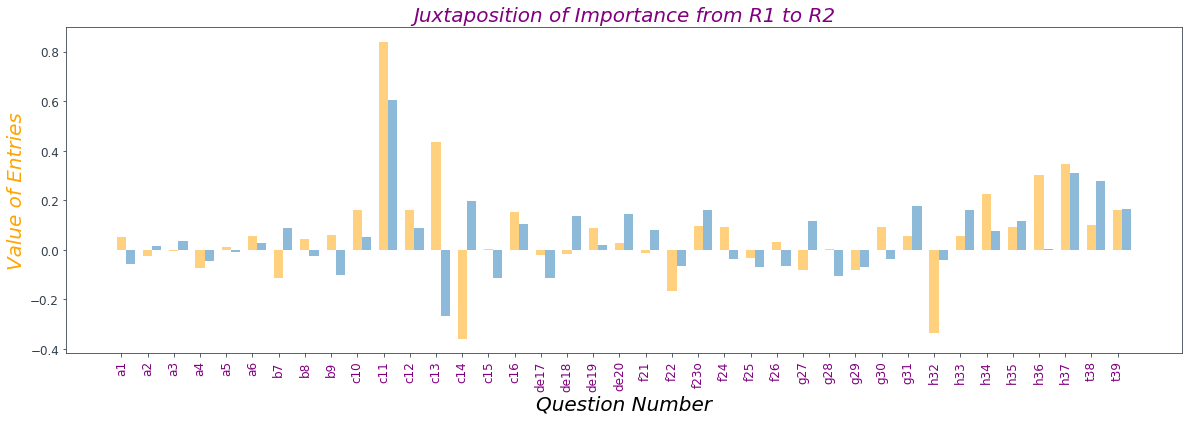

In [74]:
index=np.zeros(39)
for i in range (39):
    index[i]=i
Gender = ['Female','Male']
pos = np.arange(len(index))
bar_width = 0.35
plt.figure(figsize=(20,6))
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.title('Juxtaposition of Importance from R1 to R2', fontsize=20, fontweight=0, color='purple', loc='center', style='italic' ) 
plt.xticks(np.arange(min(index), max(index)+1, 1.0),label, color='purple',rotation='vertical')
plt.xlabel('Question Number',fontsize=20, style='italic' )
plt.ylabel('Value of Entries',fontsize=20, color='orange', style='italic' )
plt.bar(pos,A_R1F_R2[-1,:][:39],bar_width,alpha=0.5,color='orange')
plt.bar(pos+bar_width,A_R1M_R2[-1,:][:39],bar_width,alpha=0.5)

#### Change in girls

<BarContainer object of 39 artists>

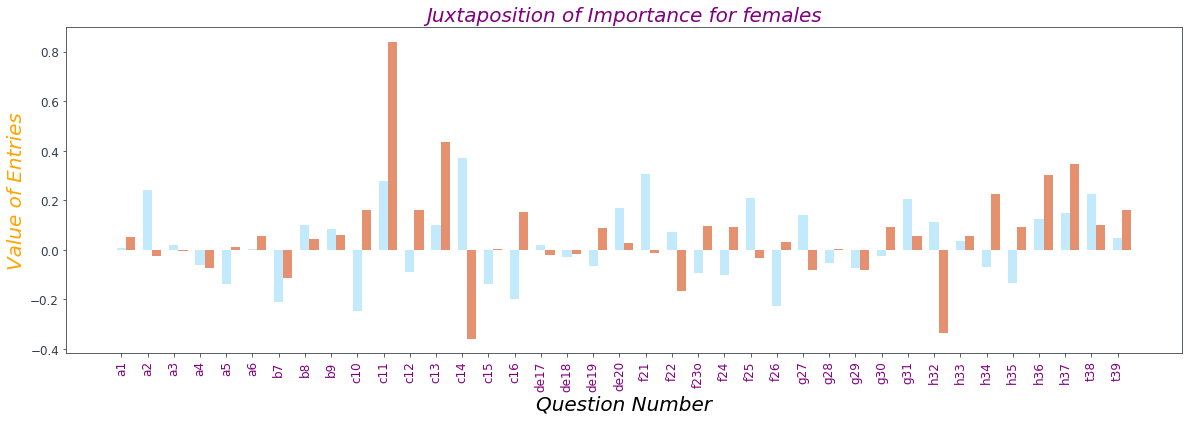

In [85]:
index=np.zeros(39)
for i in range (39):
    index[i]=i
Year = ["Y1 to R1", "R1 to R2"]
pos = np.arange(len(index))
bar_width = 0.35
plt.figure(figsize=(20,6))
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.title('Juxtaposition of Importance for females', fontsize=20, fontweight=0, color='purple', loc='center', style='italic' ) 
plt.xticks(np.arange(min(index), max(index)+1, 1.0),label, color='purple',rotation='vertical')
plt.xlabel('Question Number',fontsize=20, style='italic' )
plt.ylabel('Value of Entries',fontsize=20, color='orange', style='italic' )
plt.bar(pos,A_Y1F_R1[-1,:][:39],bar_width,alpha=0.8,color='#b3e5fc')
plt.bar(pos+bar_width,A_R1F_R2[-1,:][:39],bar_width,color = '#df744a', alpha=0.8)

#### Yellow represents period from Y1 to R1; Olive represents period from R1 to R2

<BarContainer object of 39 artists>

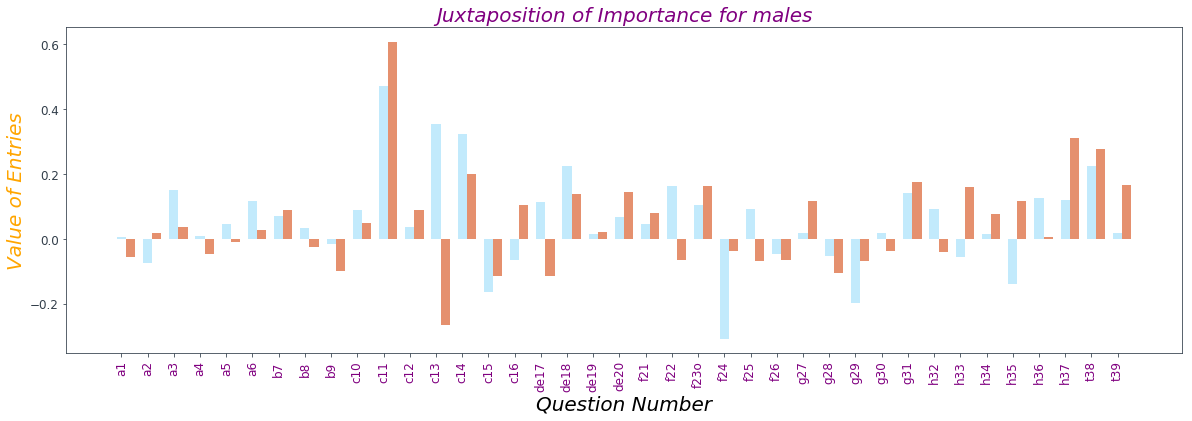

In [87]:
index=np.zeros(39)
for i in range (39):
    index[i]=i
Year = ["Y1 to R1", "R1 to R2"]
pos = np.arange(len(index))
bar_width = 0.35
plt.figure(figsize=(20,6))
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.title('Juxtaposition of Importance for males', fontsize=20, fontweight=0, color='purple', loc='center', style='italic' ) 
plt.xticks(np.arange(min(index), max(index)+1, 1.0),label, color='purple',rotation='vertical')
plt.xlabel('Question Number',fontsize=20, style='italic' )
plt.ylabel('Value of Entries',fontsize=20, color='orange', style='italic' )
plt.bar(pos,A_Y1M_R1[-1,:][:39],bar_width,alpha=0.8,color='#b3e5fc')
plt.bar(pos+bar_width,A_R1M_R2[-1,:][:39],bar_width,color = '#df744a', alpha=0.8)